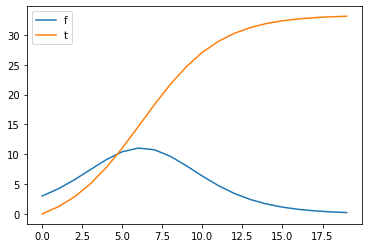

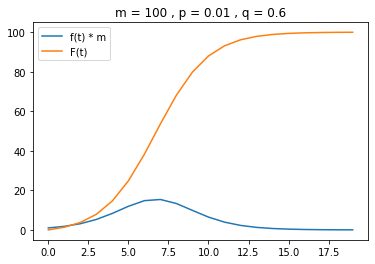

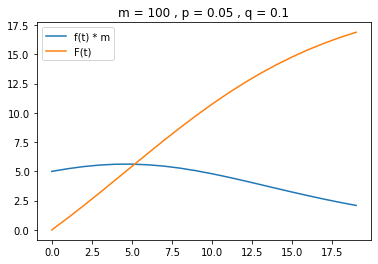

p = 0.0021304847409552774
q = 0.11069724521484992
m = 35.01310736348494


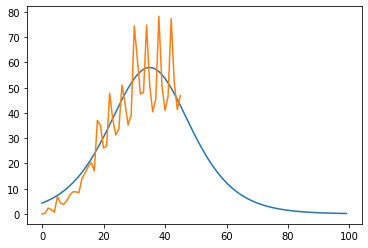

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from sklearn.linear_model import LinearRegression


def f(p, q, t):
    return (math.e ** ((p + q) * t) * p * (p + q) ** 2) / (p * math.e ** ((p + q) * t) + q) ** 2


def F(p, q, t):
    return (math.e ** ((p + q) * t) - 1) / (p * math.e ** ((p + q) * t) + q)


def przyklad1():
    t_tab = np.arange(20)
    a_tab = np.zeros(20)
    b_tab = np.zeros(20)
    m = 100
    p = 0.03
    q = 0.38

    for i in range(20):
        a_tab[i] = f(p, q, t_tab[i])
        b_tab[i] = F(p, q, t_tab[i])

    plt.plot(t_tab, a_tab * m, label="f(t)")
    plt.plot(t_tab, b_tab, label="F(t)")

    plt.legend()
    
    plt.savefig('p1.png', dpi=300)
    plt.show()


def przyklad2():
    t_tab = np.arange(20)
    a_tab = np.zeros(20)
    b_tab = np.zeros(20)
    m = 100
    p = 0.01
    q = 0.6

    for i in range(20):
        a_tab[i] = f(p, q, t_tab[i])
        b_tab[i] = F(p, q, t_tab[i])

    plt.plot(t_tab, a_tab * m, label="f(t) * m")
    plt.plot(t_tab, b_tab, label="F(t)")
    plt.title("m = 100 , p = 0.01 , q = 0.6")
    plt.legend()
    
    plt.savefig('p2.png', dpi=300)
    plt.show()


def przyklad3():
    t_tab = np.arange(20)
    a_tab = np.zeros(20)
    b_tab = np.zeros(20)
    m = 100
    p = 0.05
    q = 0.1

    for i in range(20):
        a_tab[i] = f(p, q, t_tab[i])
        b_tab[i] = F(p, q, t_tab[i])

    plt.plot(t_tab, a_tab * m, label="f(t) * m")
    plt.plot(t_tab, b_tab, label="F(t)")
    plt.title("m = 100 , p = 0.05 , q = 0.1")
    plt.legend()
    plt.savefig('p3.png', dpi=300)
    plt.show()


def przyklad4():
    # link in ref 2
    t_tab = np.arange(46)
    t_tab2 = np.arange(100)
    sales = pd.read_csv('iphone.csv')
    predictors = ['S(t)', 'S^2(t)']
    X = sales[predictors]
    y = sales['s(t)']
    lm = LinearRegression()
    model = lm.fit(X, y)
    b0 = model.intercept_
    b1 = model.coef_[0]
    b2 = model.coef_[1]
    m1 = (-b1 + math.sqrt(b1 ** 2 - 4 * b0 * b2)) / (2 * b2)
    m2 = (-b1 - math.sqrt(b1 ** 2 - 4 * b0 * b2)) / (2 * b2)
    m = max(m1, m2)
    p = b0 / m
    q = -m * b2
    t = -1 / (p + q) * math.log(p / q)
    print("p =", p)
    print("q =", q)
    print("t =", t)
    iphone_sales = list(y)
    a_tab = np.zeros(100)
    for i in range(100):
        a_tab[i] = f(p, q, t_tab2[i])
    plt.plot(t_tab2, a_tab * m)
    plt.plot(t_tab, iphone_sales)
    plt.savefig('p4.png', dpi=300)
    plt.show()


przyklad1()
przyklad2()
przyklad3()
przyklad4()


In [19]:
import pandas as pd

df = pd.read_csv('iphone.csv')
print(df.head(10))

   s(t)   S(t)     S^2(t)
0  0.00   0.00     0.0000
1  0.27   0.27     0.0729
2  2.32   2.59     6.7081
3  1.70   4.29    18.4041
4  0.72   5.00    25.0000
5  6.89  11.90   141.6100
6  4.36  16.26   264.3876
7  3.79  20.05   402.0025
8  5.21  25.26   638.0676
9  7.37  32.63  1064.7169
